In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4350 entries, 109 to 784882
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        4350 non-null   object        
 1   job_title              4350 non-null   object        
 2   job_location           4285 non-null   object        
 3   job_via                4350 non-null   object        
 4   job_schedule_type      4342 non-null   object        
 5   job_work_from_home     4350 non-null   bool          
 6   search_location        4350 non-null   object        
 7   job_posted_date        4350 non-null   datetime64[ns]
 8   job_no_degree_mention  4350 non-null   bool          
 9   job_health_insurance   4350 non-null   bool          
 10  job_country            4350 non-null   object        
 11  salary_rate            4350 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

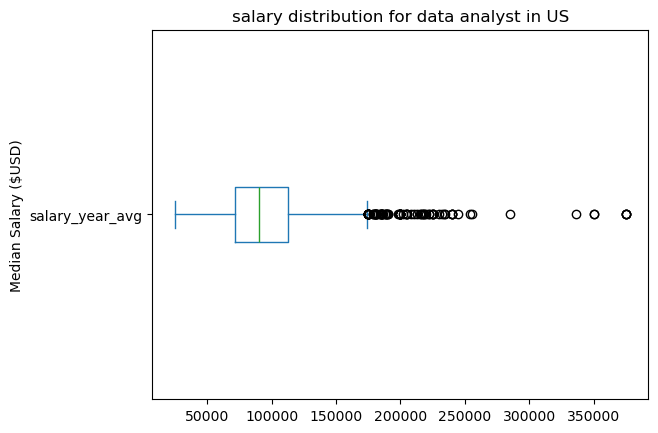

In [6]:
df_DA_US["salary_year_avg"].plot(kind ="box" , vert = False)

plt.title ( "salary distribution for data analyst in US")
plt.ylabel('Median Salary ($USD)')
plt.show()

example 2 we will be creating mixture of 3 boxplot containing data analyst , data scientist and dat aengineer on y axis and their salary avg on x axis

In [7]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[df["job_title_short"].isin(job_titles) & (df["job_country" ] == "United States")].dropna(subset="salary_year_avg").copy()

In [8]:
job_list = [df_us[df_us["job_title_short"]== job_title]["salary_year_avg"] for job_title in job_titles]



C:\Users\ASUS\AppData\Local\Temp\ipykernel_11308\1907204960.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot( job_list , labels = job_titles , vert = False)


{'whiskers': [<matplotlib.lines.Line2D at 0x18479824450>,
 'caps': [<matplotlib.lines.Line2D at 0x18479826ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18479825750>,
 'medians': [<matplotlib.lines.Line2D at 0x1847981ae10>,
 'fliers': [<matplotlib.lines.Line2D at 0x18479819150>,
 'means': []}

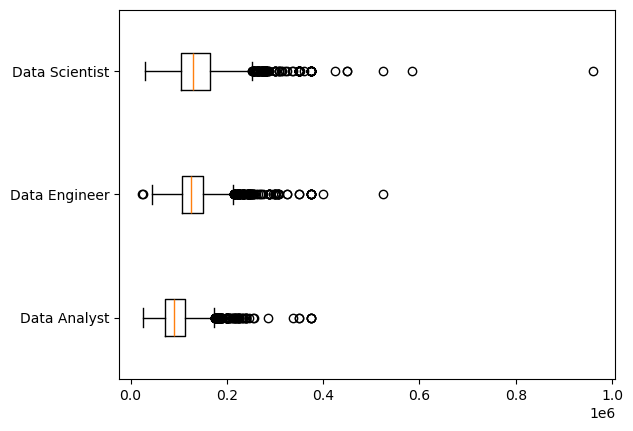

In [10]:
plt.boxplot( job_list , labels = job_titles , vert = False) # if you are confused how labels are given , just read the below line
# The labels argument (job_titles) has the same order as the inner lists in job_list.

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

one final customization that is changing the x axis to show in hundered thousands.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11308\1184243987.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


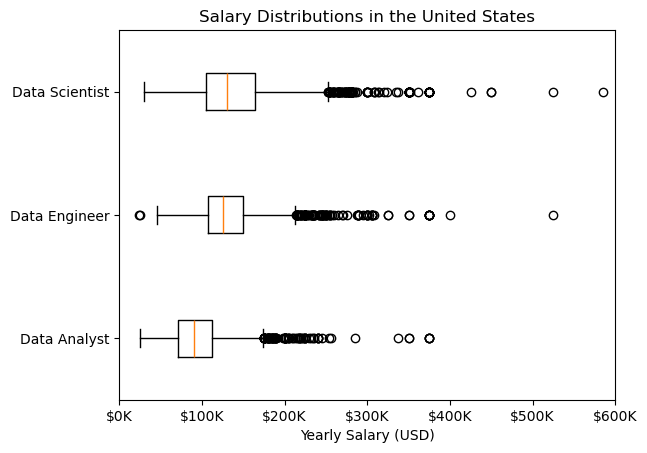

In [11]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()